In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.logical_not(np.logical_and(X[:,0],X[:,1]).astype(int))
y = np.where(y==0,-1,y)


In [91]:
Sn = pd.DataFrame(X,columns=['x1','x2'])

In [92]:
Sn['y'] = y

In [93]:
Sn

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,-1


In [94]:
n = len(Sn)
T = 10

Hallar $\theta,\theta_0$

In [95]:
%%time
theta = np.array([0,0])
sesgo = 0
for t in range(T):
    for i in range(n):
        if y[i]*(np.dot(X[i],theta)+sesgo)<=0:
            theta=theta+y[i]*X[i]
            sesgo+=y[i]
print(t,i,theta,"(%d)"%sesgo,y[i],X[i])

9 3 [-3 -2] (4) -1 [1 1]
CPU times: user 1.84 ms, sys: 991 µs, total: 2.83 ms
Wall time: 5.02 ms


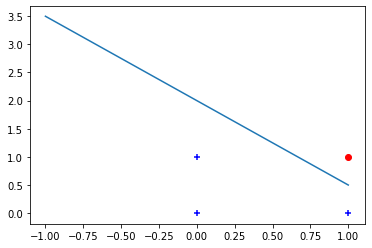

In [96]:
plt.scatter(X[:, 0][np.where(y == 1)], X[:, 1][np.where(y == 1)],marker='+',color='blue')
plt.scatter(X[:, 0][np.where(y == -1)], X[:, 1][np.where(y == -1)],marker='o',color='red')
x = np.linspace(-1,1)
plt.plot(x,(-theta[0]*x-sesgo)/theta[1])# Superficie de decisión

In [97]:
theta

array([-3, -2])

In [98]:
np.dot(theta,np.array([1,1]))+sesgo

-1

In [99]:
from sklearn.linear_model import Perceptron

In [106]:
cl = Perceptron(fit_intercept=True)

In [107]:
cl.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [108]:
theta,sesgo = cl.coef_[0],cl.intercept_[0]

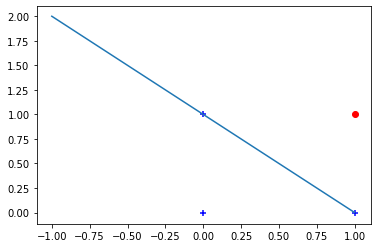

In [109]:
plt.scatter(X[:, 0][np.where(y == 1)], X[:, 1][np.where(y == 1)],marker='+',color='blue')
plt.scatter(X[:, 0][np.where(y == -1)], X[:, 1][np.where(y == -1)],marker='o',color='red')
x = np.linspace(-1,1)
plt.plot(x,(-theta[0]*x-sesgo)/theta[1])# Superficie de decisión

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_pred=cl.predict(X),y_true=y)

0.5